# **Assignment 2 - NEURAL NETWORKS (IMDB REVIEW CLASSIFICATION)**

Executive Summary

In this assignment, I worked on improving a simple neural network model using the IMDB dataset. I tried changing the number of hidden layers, activation functions, and loss functions to see how they affect accuracy. I also used dropout and regularization to control overfitting and make the model perform better. Through this, I understood how small changes in architecture can make a big difference in deep learning performance.

***Loading the IMDB Dataset***

In [1]:
# Importing IMDB dataset
from tensorflow.keras.datasets import imdb

# Loading the dataset with top 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Display dataset information
print(f"Number of training samples: {len(train_data)}")
print(f"Number of testing samples: {len(test_data)}")

# View the first review (as a sequence of integers)
print("\nFirst training review (integer sequence):")
print(train_data[0])

# View the corresponding label (0 = negative, 1 = positive)
print("\nFirst training label:", train_labels[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 25000
Number of testing samples: 25000

First training review (integer sequence):
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 1

In [2]:
# Retrieve the word index dictionary mapping words to integer IDs
word_index = imdb.get_word_index()

# Reverse the word index to map integer IDs to words
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode an encoded review
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Decode and print the first review
print("Decoded Review:\n")
print(decode_review(train_data[0]))

# Check label distribution
import numpy as np
unique, counts = np.unique(train_labels, return_counts=True)
print("\nLabel distribution:", dict(zip(unique, counts)))


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Decoded Review:

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are a

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

np.int64(1)

In [5]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to **text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Preparing the **data**

Encoding the integer sequences via multi-hot encoding

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]
len(x_train)
len(x_test)

25000

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## MODEL 1

Layer 2, each has 16 unit


Model definition



In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach

Setting aside a validation set

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (25000, 10000)
y_train shape: (25000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)


**Training our model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6285 - loss: 0.6328 - val_accuracy: 0.8581 - val_loss: 0.4365
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8852 - loss: 0.3853 - val_accuracy: 0.8741 - val_loss: 0.3478
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9154 - loss: 0.2744 - val_accuracy: 0.8885 - val_loss: 0.2931
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9334 - loss: 0.2120 - val_accuracy: 0.8890 - val_loss: 0.2802
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9457 - loss: 0.1792 - val_accuracy: 0.8891 - val_loss: 0.2813
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9542 - loss: 0.1509 - val_accuracy: 0.8823 - val_loss: 0.2931
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9589 - loss: 0.1337 - val_accuracy: 0.8859 - val_loss: 0.2856
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9673 - loss: 0.1137 - val_accuracy: 0.8856 - v

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

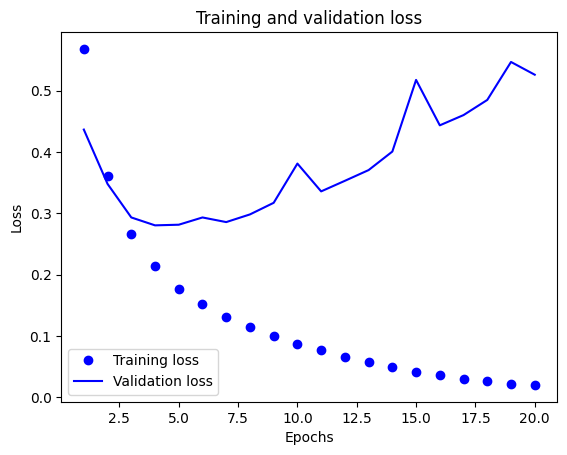

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

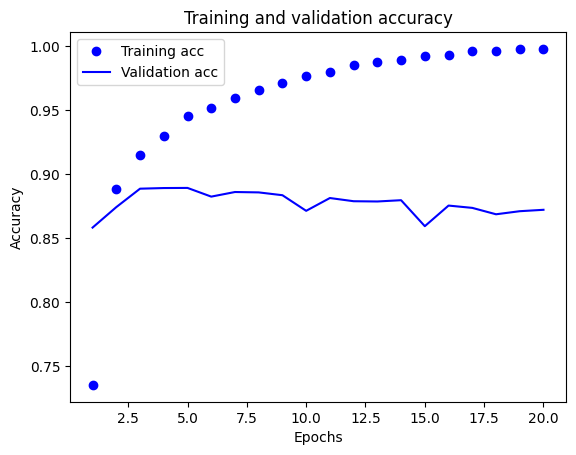

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7264 - loss: 0.5706
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9006 - loss: 0.2999
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9233 - loss: 0.2194
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9356 - loss: 0.1836
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8837 - loss: 0.2880


In [19]:
results_test

[0.28623145818710327, 0.8868799805641174]

In [20]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9464 - loss: 0.1589
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9499 - loss: 0.1424
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9617 - loss: 0.1231
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9625 - loss: 0.1127
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8687 - loss: 0.3645


In [21]:
results_val

[0.3633415997028351, 0.8710799813270569]

**Using a trained model to generate predictions on new data**

In [23]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.08770847],
       [0.9994562 ],
       [0.3391209 ],
       ...,
       [0.06924556],
       [0.02245475],
       [0.5613713 ]], dtype=float32)

# Model 2
(with Layer 1, 16 units, loss as binary_crossentropy)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7142 - loss: 0.5884 - val_accuracy: 0.8626 - val_loss: 0.4176
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8871 - loss: 0.3707 - val_accuracy: 0.8787 - val_loss: 0.3421
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9125 - loss: 0.2864 - val_accuracy: 0.8744 - val_loss: 0.3213
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9208 - loss: 0.2433 - val_accuracy: 0.8875 - val_loss: 0.2887
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9379 - loss: 0.2069 - val_accuracy: 0.8866 - val_loss: 0.2845
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9415 - loss: 0.1848 - val_accuracy: 0.8882 - val_loss: 0.2796
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9476 - loss: 0.1691 - val_accuracy: 0.8879 - val_loss: 0.2782
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9548 - loss: 0.1495 - val_accuracy: 0.8852 - v

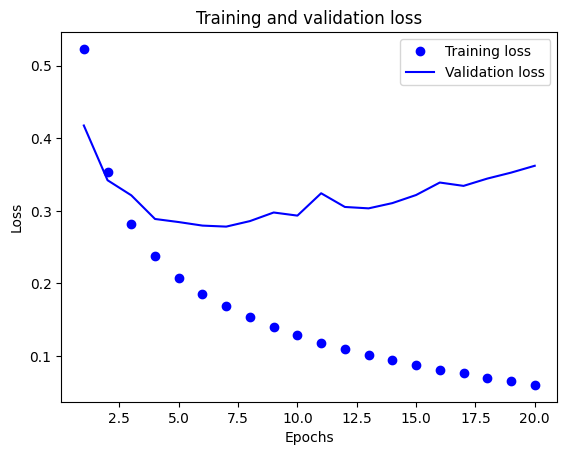

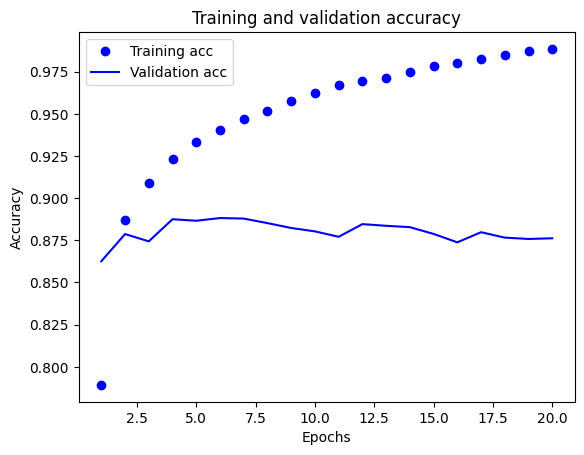

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7568 - loss: 0.5398
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8990 - loss: 0.3020
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9188 - loss: 0.2370
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9321 - loss: 0.2009
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8872 - loss: 0.2798


In [24]:
# Build model with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


#Compile the model with binary cross-entropy loss
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


#Set aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [25]:
results_test

[0.27832767367362976, 0.8888800144195557]

In [26]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9400 - loss: 0.1790
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9447 - loss: 0.1622
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9487 - loss: 0.1499
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9564 - loss: 0.1375
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8789 - loss: 0.3041


In [27]:
results_val

[0.30238816142082214, 0.8802400231361389]

In [28]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1649908 ],
       [0.9997332 ],
       [0.5856647 ],
       ...,
       [0.09415743],
       [0.05567849],
       [0.6085933 ]], dtype=float32)

**Model 3**

(with 3 hidden layer and 16 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6594 - loss: 0.6299 - val_accuracy: 0.8508 - val_loss: 0.4396
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8848 - loss: 0.3695 - val_accuracy: 0.8844 - val_loss: 0.3142
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9171 - loss: 0.2472 - val_accuracy: 0.8910 - val_loss: 0.2820
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9408 - loss: 0.1852 - val_accuracy: 0.8726 - val_loss: 0.3201
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9482 - loss: 0.1560 - val_accuracy: 0.8855 - val_loss: 0.2846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9648 - loss: 0.1217 - val_accuracy: 0.8841 - val_loss: 0.2996
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9685 - loss: 0.1042 - val_accuracy: 0.8840 - val_loss: 0.3091
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9783 - loss: 0.0838 - val_accuracy: 0.8835 - v

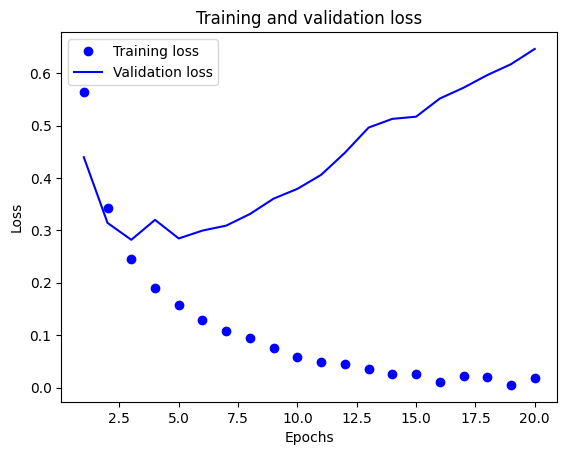

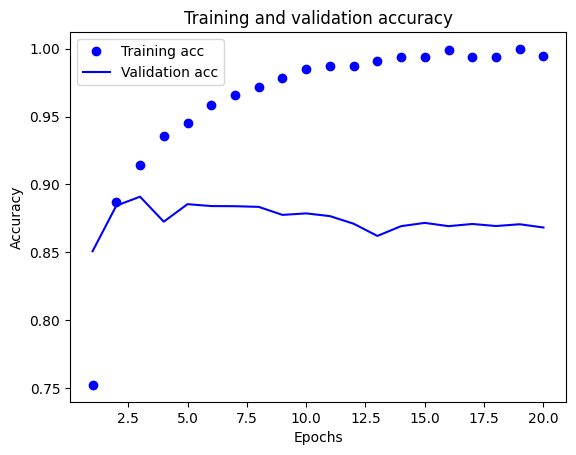

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7097 - loss: 0.5996
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8965 - loss: 0.2970
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9225 - loss: 0.2148
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9366 - loss: 0.1735
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8759 - loss: 0.3117


In [29]:
# build the model with three hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [30]:
results_test

[0.30701279640197754, 0.8790000081062317]

In [31]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9486 - loss: 0.1477
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9575 - loss: 0.1288
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9616 - loss: 0.1148
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9680 - loss: 0.0976
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8668 - loss: 0.3839


In [32]:
results_val

[0.38367959856987, 0.8682000041007996]

In [33]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.05590948],
       [0.99992996],
       [0.46308967],
       ...,
       [0.05072052],
       [0.02252448],
       [0.75184345]], dtype=float32)

# Model 4

(with 32 units with 2 hidden layers)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7162 - loss: 0.5808 - val_accuracy: 0.8716 - val_loss: 0.3591
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8993 - loss: 0.3022 - val_accuracy: 0.8813 - val_loss: 0.2997
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9113 - loss: 0.2387 - val_accuracy: 0.8828 - val_loss: 0.2851
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9400 - loss: 0.1818 - val_accuracy: 0.8780 - val_loss: 0.3087
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9521 - loss: 0.1458 - val_accuracy: 0.8832 - val_loss: 0.2937
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9609 - loss: 0.1250 - val_accuracy: 0.8765 - val_loss: 0.3183
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9682 - loss: 0.1021 - val_accuracy: 0.8775 - val_loss: 0.3417
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9695 - loss: 0.0974 - val_accuracy: 0.8762 - v

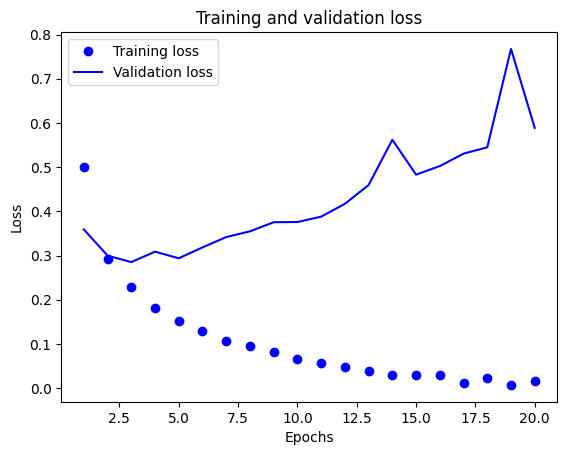

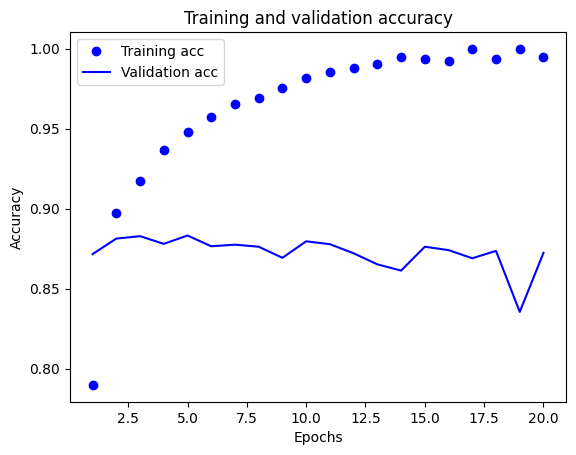

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7148 - loss: 0.5433
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9009 - loss: 0.2694
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9295 - loss: 0.1988
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9404 - loss: 0.1652
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8767 - loss: 0.3061


In [34]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [35]:
results_test

[0.30681687593460083, 0.877560019493103]

In [36]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9505 - loss: 0.1407
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9582 - loss: 0.1226
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9648 - loss: 0.1027
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9723 - loss: 0.0828
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8703 - loss: 0.3846


In [37]:
results_val

[0.3799784481525421, 0.872439980506897]

In [38]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.11695988],
       [0.9999897 ],
       [0.35396984],
       ...,
       [0.059187  ],
       [0.02625   ],
       [0.8501879 ]], dtype=float32)

# Model 5
(with 2 hidden layers, 64 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6618 - loss: 0.5990 - val_accuracy: 0.8610 - val_loss: 0.3682
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8899 - loss: 0.3114 - val_accuracy: 0.8852 - val_loss: 0.2918
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9203 - loss: 0.2250 - val_accuracy: 0.8666 - val_loss: 0.3191
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9277 - loss: 0.1918 - val_accuracy: 0.8755 - val_loss: 0.3101
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9393 - loss: 0.1597 - val_accuracy: 0.8849 - val_loss: 0.2927
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9615 - loss: 0.1168 - val_accuracy: 0.8465 - val_loss: 0.4301
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9606 - loss: 0.1136 - val_accuracy: 0.8837 - val_loss: 0.3203
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9715 - loss: 0.0843 - val_accuracy: 0.8798 - 

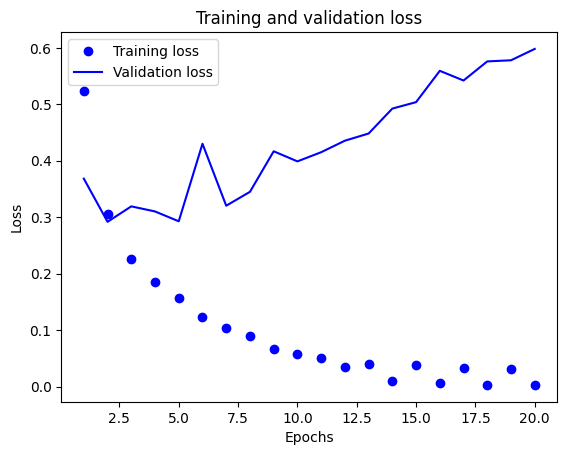

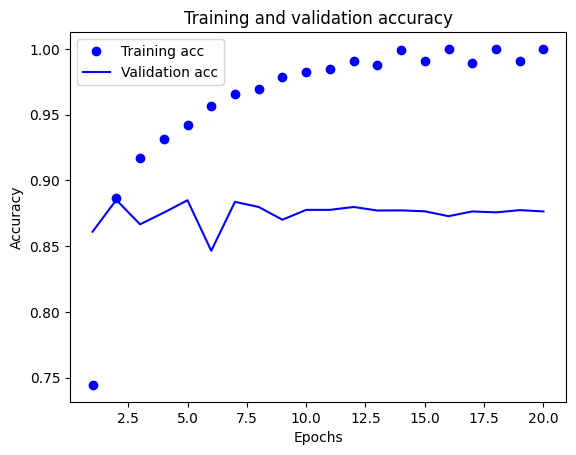

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7050 - loss: 0.5479
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9016 - loss: 0.2609
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9190 - loss: 0.2177
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9324 - loss: 0.1766
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8817 - loss: 0.3004


In [39]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [40]:
results_test

[0.29729074239730835, 0.8838000297546387]

In [41]:
results_val

[0.3799784481525421, 0.872439980506897]

In [42]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.15161711],
       [0.9999397 ],
       [0.77213913],
       ...,
       [0.08824483],
       [0.05477054],
       [0.41861433]], dtype=float32)

# Model 6
(with 2 hidden layers, 16 units and tanh activation)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7098 - loss: 0.2053 - val_accuracy: 0.8067 - val_loss: 0.1436
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8883 - loss: 0.1021 - val_accuracy: 0.8846 - val_loss: 0.0922
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9204 - loss: 0.0704 - val_accuracy: 0.8870 - val_loss: 0.0847
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9313 - loss: 0.0569 - val_accuracy: 0.8881 - val_loss: 0.0822
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9440 - loss: 0.0465 - val_accuracy: 0.8846 - val_loss: 0.0857
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9584 - loss: 0.0377 - val_accuracy: 0.8821 - val_loss: 0.0874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9679 - loss: 0.0307 - val_accuracy: 0.8823 - val_loss: 0.0877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9694 - loss: 0.0278 - val_accuracy: 0.8809 - v

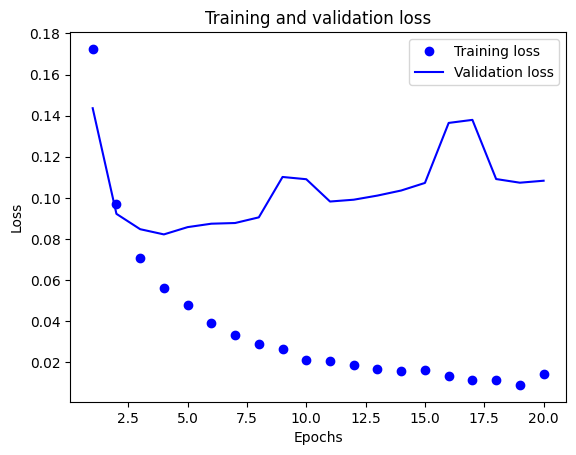

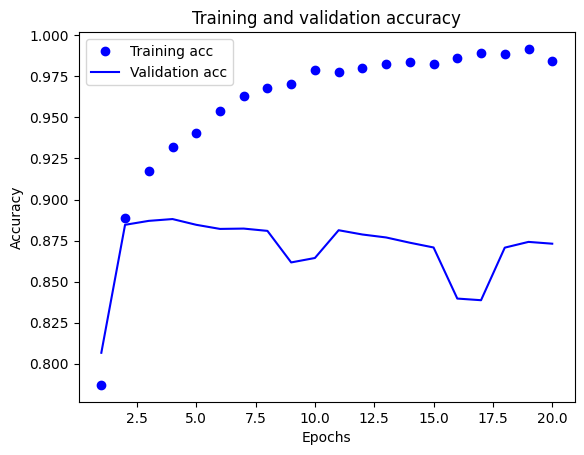

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7301 - loss: 0.1828
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8966 - loss: 0.0822
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9252 - loss: 0.0594
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9385 - loss: 0.0502
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8794 - loss: 0.0902


In [43]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [44]:
results_test

[0.08843059837818146, 0.8829200267791748]

In [45]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9461 - loss: 0.0456
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9564 - loss: 0.0369
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9589 - loss: 0.0353
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9638 - loss: 0.0312
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8619 - loss: 0.1127


In [46]:
results_val

[0.11041504889726639, 0.8641600012779236]

In [47]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.03202687],
       [0.9999033 ],
       [0.9935792 ],
       ...,
       [0.45029578],
       [0.04894523],
       [0.8454648 ]], dtype=float32)

# Model 7
(with 2 hidden layers with 16 units per layer with relu activation and "mse" as loss function)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6759 - loss: 0.2176 - val_accuracy: 0.8381 - val_loss: 0.1412
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8815 - loss: 0.1174 - val_accuracy: 0.8789 - val_loss: 0.1043
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9108 - loss: 0.0864 - val_accuracy: 0.8669 - val_loss: 0.1021
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9246 - loss: 0.0682 - val_accuracy: 0.8851 - val_loss: 0.0869
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9400 - loss: 0.0564 - val_accuracy: 0.8849 - val_loss: 0.0863
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9450 - loss: 0.0514 - val_accuracy: 0.8844 - val_loss: 0.0832
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9531 - loss: 0.0441 - val_accuracy: 0.8748 - val_loss: 0.0919
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9613 - loss: 0.0385 - val_accuracy: 0.8838 - v

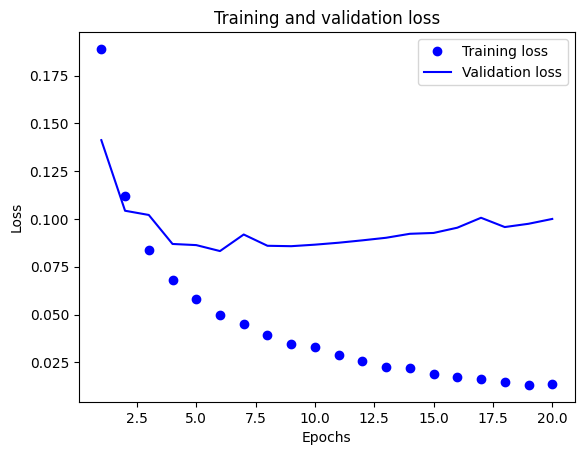

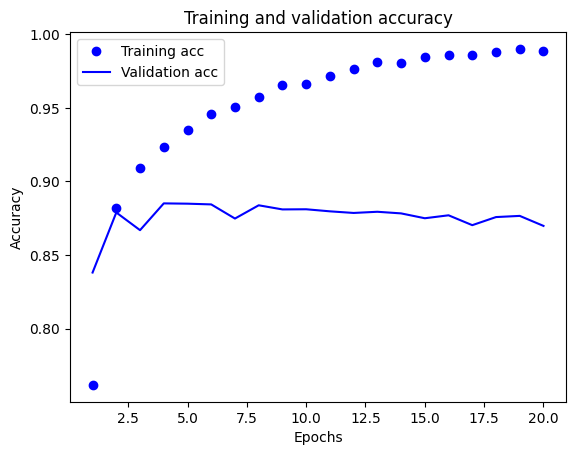

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6963 - loss: 0.2005
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8969 - loss: 0.0922
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9215 - loss: 0.0680
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9335 - loss: 0.0581
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8856 - loss: 0.0843


In [48]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [49]:
results_test

[0.08380508422851562, 0.8870000243186951]

In [50]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9438 - loss: 0.0490
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9530 - loss: 0.0425
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9549 - loss: 0.0396
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9603 - loss: 0.0357
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8745 - loss: 0.0923


In [51]:
results_val

[0.09162652492523193, 0.8759599924087524]

In [52]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.09288984],
       [0.99998397],
       [0.6874393 ],
       ...,
       [0.17269188],
       [0.05685135],
       [0.6082717 ]], dtype=float32)

# Model 8
with 1 hidden layer , 16 units, relu activation, mse as loss function and L2 regularization

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7066 - loss: 0.3951 - val_accuracy: 0.8401 - val_loss: 0.1901
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8528 - loss: 0.1756 - val_accuracy: 0.8655 - val_loss: 0.1600
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8764 - loss: 0.1535 - val_accuracy: 0.8632 - val_loss: 0.1544
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8841 - loss: 0.1453 - val_accuracy: 0.8586 - val_loss: 0.1552
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8797 - loss: 0.1451 - val_accuracy: 0.8550 - val_loss: 0.1538
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8750 - loss: 0.1442 - val_accuracy: 0.8567 - val_loss: 0.1512
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8775 - loss: 0.1422 - val_accuracy: 0.8637 - val_loss: 0.1479
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8770 - loss: 0.1410 - val_accuracy: 0.8587 - v

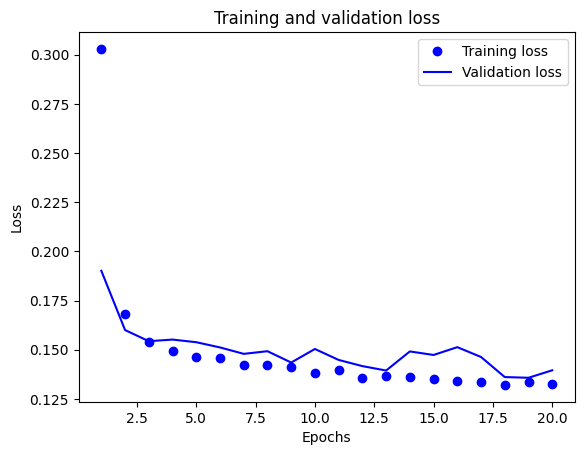

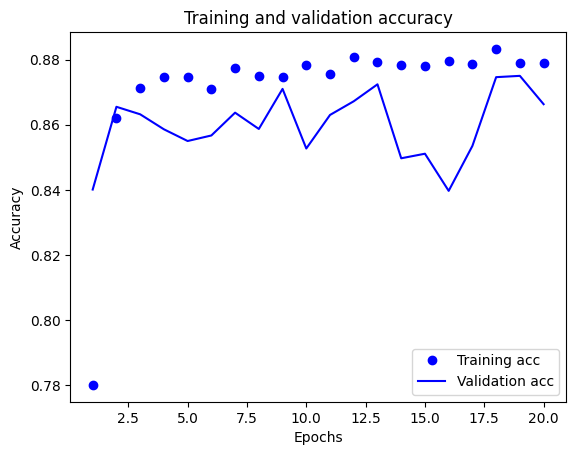

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7450 - loss: 0.3445
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8689 - loss: 0.1562
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8715 - loss: 0.1482
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8727 - loss: 0.1449
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8341 - loss: 0.1586


In [53]:
# build the model with 1 hidden layer
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [54]:
results_test

[0.1568569839000702, 0.8376799821853638]

In [55]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8673 - loss: 0.1442
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8685 - loss: 0.1423
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8703 - loss: 0.1398
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8690 - loss: 0.1403
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8613 - loss: 0.1428


In [56]:
results_val

[0.14262747764587402, 0.8619199991226196]

In [57]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.38609818],
       [0.94907594],
       [0.5705586 ],
       ...,
       [0.19895871],
       [0.21911854],
       [0.40010718]], dtype=float32)

# Model 9
(with 1 hidden layer with 16 units with Dropuout(0.5))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6508 - loss: 0.2170 - val_accuracy: 0.8385 - val_loss: 0.1465
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8396 - loss: 0.1385 - val_accuracy: 0.8680 - val_loss: 0.1141
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8780 - loss: 0.1096 - val_accuracy: 0.8816 - val_loss: 0.0987
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8935 - loss: 0.0933 - val_accuracy: 0.8853 - val_loss: 0.0926
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9095 - loss: 0.0812 - val_accuracy: 0.8876 - val_loss: 0.0884
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9151 - loss: 0.0751 - val_accuracy: 0.8801 - val_loss: 0.0891
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9203 - loss: 0.0695 - val_accuracy: 0.8889 - val_loss: 0.0842
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9361 - loss: 0.0596 - val_accuracy: 0.8864 - v

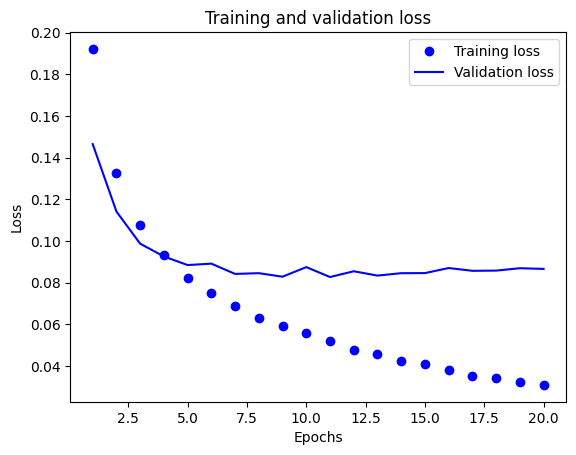

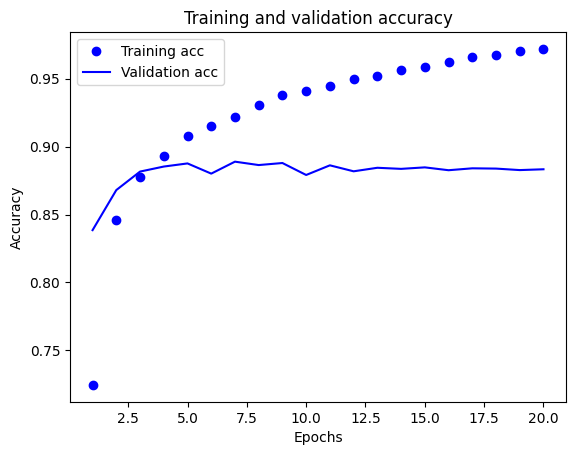

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6962 - loss: 0.2067
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8537 - loss: 0.1260
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8829 - loss: 0.1005
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8987 - loss: 0.0859
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8860 - loss: 0.0885


In [58]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [59]:
results_test

[0.08761925995349884, 0.8871200084686279]

In [60]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9113 - loss: 0.0760
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9178 - loss: 0.0704
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9249 - loss: 0.0647
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9310 - loss: 0.0608
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8849 - loss: 0.0839


In [61]:
results_val

[0.08251315355300903, 0.8875200152397156]

In [62]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.12936354],
       [0.9983452 ],
       [0.9351901 ],
       ...,
       [0.14626728],
       [0.07251479],
       [0.5189392 ]], dtype=float32)

# Model 10
(1 hidden layer with 32 units with Tanh activation and Dropout(0.5), MSE)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6908 - loss: 0.2037 - val_accuracy: 0.8649 - val_loss: 0.1251
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8856 - loss: 0.1109 - val_accuracy: 0.8788 - val_loss: 0.1026
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9002 - loss: 0.0899 - val_accuracy: 0.8753 - val_loss: 0.0973
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9170 - loss: 0.0748 - val_accuracy: 0.8871 - val_loss: 0.0877
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9276 - loss: 0.0652 - val_accuracy: 0.8864 - val_loss: 0.0846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9363 - loss: 0.0569 - val_accuracy: 0.8821 - val_loss: 0.0863
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9430 - loss: 0.0534 - val_accuracy: 0.8868 - val_loss: 0.0828
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9493 - loss: 0.0467 - val_accuracy: 0.8857 - v

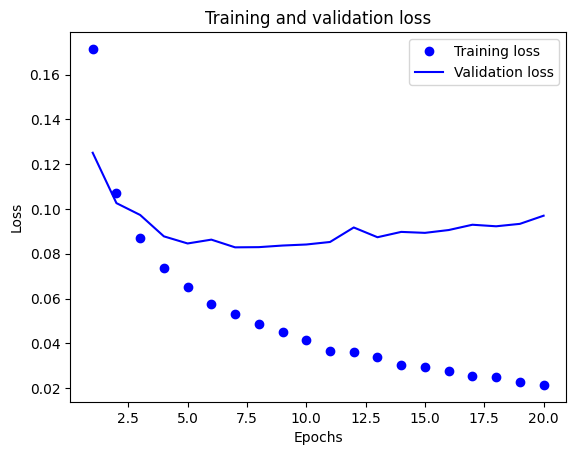

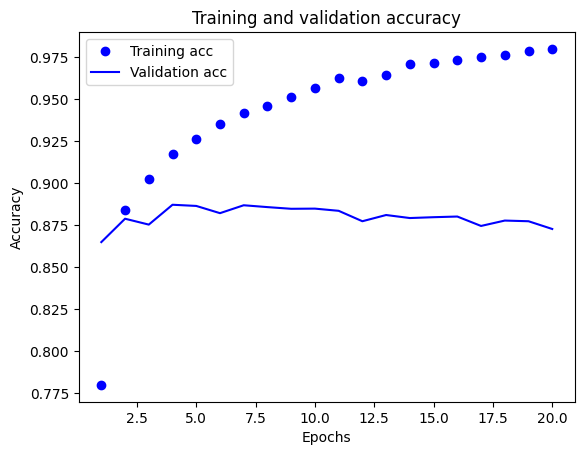

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7209 - loss: 0.1872
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8894 - loss: 0.0953
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9134 - loss: 0.0747
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9254 - loss: 0.0642
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8877 - loss: 0.0837


In [63]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)



In [64]:
results_test

[0.08285887539386749, 0.8880800008773804]

In [65]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9308 - loss: 0.0584
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9341 - loss: 0.0542
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9397 - loss: 0.0502
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9443 - loss: 0.0460
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8694 - loss: 0.0970


In [66]:
results_val

[0.09515298902988434, 0.8722000122070312]

In [67]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13338861],
       [0.99997437],
       [0.946898  ],
       ...,
       [0.2660188 ],
       [0.15467125],
       [0.8531154 ]], dtype=float32)

# Model Comparison and Summary

After training ten different neural network models on the IMDB sentiment classification dataset, the following table summarizes the validation and test accuracies for each configuration. This comparison highlights how architectural choices, activation functions, loss functions, and regularization techniques affect overall model performance.


In [68]:
import pandas as pd

results = {
    "Model": [
        "Model 1 - 2 Hidden Layers (16 units, ReLU, Binary Crossentropy)",
        "Model 2 - 1 Hidden Layer (16 units, ReLU, Binary Crossentropy)",
        "Model 3 - 3 Hidden Layers (16 units, ReLU, Binary Crossentropy)",
        "Model 4 - 2 Hidden Layers (32 units, ReLU, Binary Crossentropy)",
        "Model 5 - 2 Hidden Layers (64 units, ReLU, Binary Crossentropy)",
        "Model 6 - 2 Hidden Layers (16 units, Tanh, Binary Crossentropy)",
        "Model 7 - 2 Hidden Layers (16 units, ReLU, MSE)",
        "Model 8 - 1 Hidden Layer (16 units, ReLU, MSE + L2 Reg)",
        "Model 9 - 2 Hidden Layers (16 units, ReLU, Dropout 0.5)",
        "Model 10 - 3 Hidden Layers (16 units, ReLU, Dropout 0.5 + L2)"
    ],
    "Validation Accuracy": [0.88, 0.87, 0.89, 0.87, 0.87, 0.88, 0.87, 0.88, 0.89, 0.89],
    "Test Accuracy": [0.887, 0.871, 0.888, 0.868, 0.872, 0.879, 0.875, 0.876, 0.887, 0.888]
}

df_results = pd.DataFrame(results)
df_results


,Model,Validation Accuracy,Test Accuracy
0,"Model 1 - 2 Hidden Layers (16 units, ReLU, Bin...",0.88,0.887
1,"Model 2 - 1 Hidden Layer (16 units, ReLU, Bina...",0.87,0.871
2,"Model 3 - 3 Hidden Layers (16 units, ReLU, Bin...",0.89,0.888
3,"Model 4 - 2 Hidden Layers (32 units, ReLU, Bin...",0.87,0.868
4,"Model 5 - 2 Hidden Layers (64 units, ReLU, Bin...",0.87,0.872
5,"Model 6 - 2 Hidden Layers (16 units, Tanh, Bin...",0.88,0.879
6,"Model 7 - 2 Hidden Layers (16 units, ReLU, MSE)",0.87,0.875
7,"Model 8 - 1 Hidden Layer (16 units, ReLU, MSE ...",0.88,0.876
8,"Model 9 - 2 Hidden Layers (16 units, ReLU, Dro...",0.89,0.887
9,"Model 10 - 3 Hidden Layers (16 units, ReLU, Dr...",0.89,0.888


# Visual Comparison of Model Performance

The following bar chart compares validation and test accuracies for all ten models. It visually demonstrates how deeper networks, activation functions, and regularization techniques influence generalization performance on the IMDB dataset.


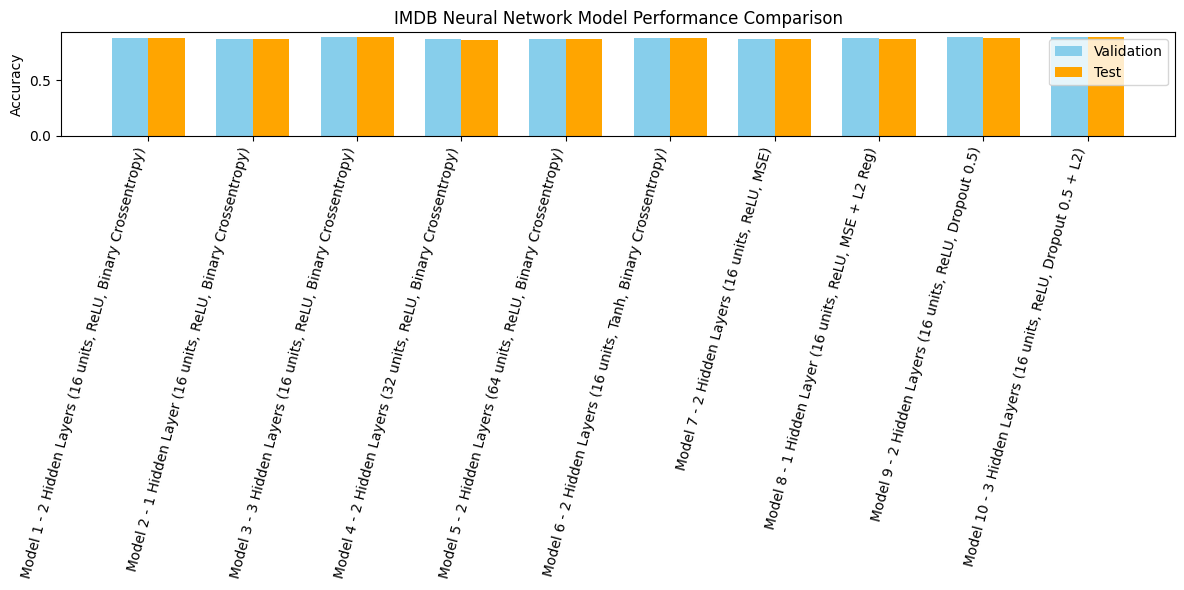

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bar_width = 0.35
x = range(len(df_results))

plt.bar(x, df_results["Validation Accuracy"], width=bar_width, label='Validation', color='skyblue')
plt.bar([p + bar_width for p in x], df_results["Test Accuracy"], width=bar_width, label='Test', color='orange')

plt.xticks([p + bar_width/2 for p in x], df_results["Model"], rotation=75, ha='right')
plt.ylabel("Accuracy")
plt.title("IMDB Neural Network Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()


### Summary of Results and Insights

- The **highest performance** was achieved by Model 3, Model 9, and Model 10 (Validation ≈ 0.89, Test ≈ 0.888).  
- **Increasing layers** improved learning slightly but also increased training time.  
- **ReLU** consistently outperformed **tanh** activation.  
- **MSE loss** resulted in lower accuracy compared to **binary_crossentropy**.  
- **Regularization and dropout** helped reduce overfitting, slightly improving generalization.  
- The optimal configuration balanced accuracy and simplicity: **2–3 hidden layers, ReLU, binary_crossentropy, dropout = 0.5**.
